# ПРОСЬБА НЕ ПРОВЕРЯТЬ. ДОРАБАТЫВАЮ. 

Задание «Основы описательной статистики, виды распределений в Python»

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
# отображаем графики прямо в jupyter'e
%matplotlib inline

1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

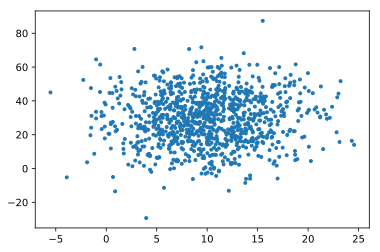

In [3]:
# Нормальное распределение с параметрами mean=10 и 30, sigma=5 и 15
norm_rv1 = sts.norm(loc=10, scale=5)
norm_rv2 = sts.norm(loc=30, scale=15)
# Генерация 1000 случайных чисел
x = norm_rv1.rvs(size=1000)
y = norm_rv2.rvs(size=1000)
plt.scatter(x, y, marker='.')

2. Нарисовать плотность распределения полученной выборки x.

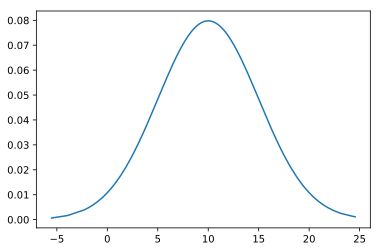

In [4]:
pdf = norm_rv1.pdf(sorted(x))
plt.plot(sorted(x), pdf)

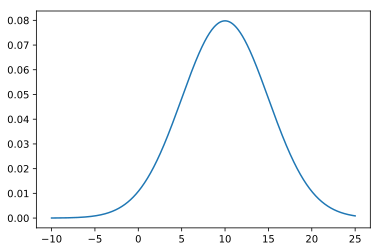

In [5]:
# или второй способ
norm_rv = sts.norm(loc=10, scale=5)
x = np.linspace(-10,25,1000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

In [47]:
X = np.vstack((x, y)).T

In [39]:
X = X - np.mean(X, 0)
sx, sy = 20, 4
Scale = np.array([[sx, 0], [0, sy]])
Y = X.dot(Scale)

4. Построить график зависимости (корелляции) x от y.

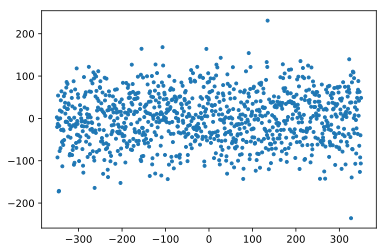

In [40]:
plt.scatter(Y[:, 0], Y[:, 1], marker='.')

5. Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

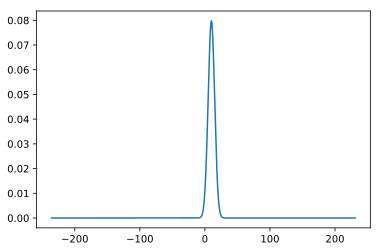

In [46]:
pdf = norm_rv1.pdf(sorted(Y[:, 1]))
plt.plot(sorted(Y[:, 1]), pdf)

6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [5]:
corr, p_value = pearsonr(x, y)
print(corr)

-0.004616680636123226


In [ ]:
# В нашем случае коэффициент корреляции равен -0.0046, это очень слабая отрицательная корреляция, 
# то есть считаем, что наши переменные независимы.

In [ ]:
# Коэффициент равный 0 значит, что связи между x и y не существует, то есть переменные являются независимыми. 

In [ ]:
# При отрицательном значении коэффициента корреляции: когда значение одной переменной возрастает, 
# то значение другой переменной убывает. 

In [ ]:
# При положительном значении коэффициента корреляции: когда значение одной переменной возрастает, 
# то значение другой переменной тоже возраствет.

7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

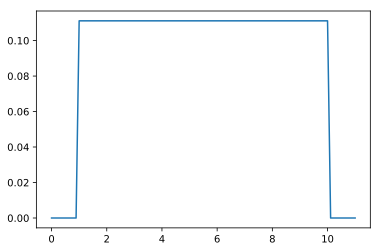

In [36]:
uniform_rv = sts.uniform(1, 9)

uniform_rv.rvs(size=100)

x1 = np.linspace(0, 11, 100)
pdf = uniform_rv.pdf(x1)
plt.plot(x1, pdf)

In [ ]:
# При равномерном распределении плотность распределения на заданном отрезке - постоянна, вне его - равна нулю.
# В случае нормального распределения у случайной величины есть предпочтительное значение. 

8. Найти на графике примеры выброса. Что они означают?
https://github.com/yustiks/statistics_in_python/blob/master/dz.ipynb

9. Найти корелляцию в следующих данных:

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.